## Automated Surface Event Detection from Seismograms
Author: Akash Kharita
    
This notebook demonstrates how to use my machine learning model to detect surface events (snow avalanches/rockfalls/debris flows) through continuous seismograms from multiple station. We will take examples of verified events and see how my model/detector behaves around the event. 


Feel free to run this model on the starttimes and durations you would like!

## Importing dependencies


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import yaml
import obspy
import matplotlib.lines as mlines


## Defining some helper functions

In [44]:
st_overall_data = []
st_overall_times = []
st_overall = []
result_stns = []
index_stns = []
prob_stns = []



def plot_detection_results(st_overall_data = st_overall_data, st_overall_times = st_overall_times, st_overall = st_overall, result_stns = result_stns, index_stns = index_stns, prob_stns = prob_stns, xlim = [0,300], ev_markers = [60,300]):
    plt.rcParams['xtick.labelsize'] = 16  # Font size for xtick labels
    plt.rcParams['ytick.labelsize'] = 20  # Font size for ytick labels

    fig, axs = plt.subplots(len(st_overall_data), 1, figsize=(15, 3*len(st_overall_data)))

    for k in range(len(st_overall_data)):

        ## This is plotting the normalized data
        axs[k].plot(st_overall_times[k], st_overall_data[k] / np.max(abs(st_overall_data[k])))

        ## Setting the title of the plot
        axs[k].set_title(st_overall[k][0].id, fontsize=20)

        ## These are the colors of detection window. 
        colors = ['black', 'blue', 'gray', 'red']
        for i in range(len(index_stns[k])):
            axs[k].axvline(30 * index_stns[k][i] + 75, ls='--', color=colors[int(result_stns[k][i])], alpha = 0.6)
            
        # Plot circles on top of the line plot
        for i in range(len(index_stns[k])):
            if result_stns[k][i] == 3:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='red', s=100, zorder=5)
            elif result_stns[k][i] == 0:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 0][i], ec='k', marker='o', c='black', s=100, zorder=5)
            elif result_stns[k][i] == 1:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 1][i], ec='k', marker='o', c='blue', s=100, zorder=5)
            else:
                axs[k].scatter(30 * np.array(index_stns[k])[i] + 75, np.array(prob_stns[k])[:, :, 3][i], ec='k', marker='o', c='white', s=100, zorder=5)

        # Create custom legend for circular markers
        legend_elements = [
            mlines.Line2D([], [], marker='o', color='red', label='Prob (Su)', markersize=10),
            mlines.Line2D([], [], marker='o', color='k', label='Prob (Eq)', markersize=10)
        ]
        axs[k].legend(handles=legend_elements, loc='upper right', fontsize=12)

        axs[k].set_xlabel('Time(s) since ' + str(starttime).split('.')[0], fontsize=20)
        axs[k].set_xlim(xlim[0], xlim[1])  # Set x-axis limits if needed
        axs[k].axvline(ev_markers[0], ls = '-', c = 'k', lw = 2)
        axs[k].axvline(ev_markers[1], ls = '-', c = 'k', lw = 2)
        
        
    plt.tight_layout()  # Adjust subplots to avoid overlap
    plt.show()


## Importing the surface event detection code

In [3]:
from Automated_Surface_Event_Detection import surface_event_detection

Title: Trained Random Forest model and scaler parameters on new physical and tsfel features from seismic data of 150s length.
Keywords: 
Publication date: 2024-06-19
DOI: 10.5281/zenodo.12171547
Total size: 116.2 MB

Link: https://zenodo.org/record/12171547/files/scaler_params.csv   size: 0.0 MB
scaler_params.csv is already downloaded correctly.

Link: https://zenodo.org/record/12171547/files/best_rf_model_all_features_50_100.joblib   size: 116.2 MB

Checksum is correct. (7c8311fcc17a544d2255596e922be023)
All files have been downloaded.


File 'best_rf_model_all_features_50_100.joblib' removed successfully.


![Mount Rainier Stations](../Extras/Cover_Image.png)


![Mount Rainier Glaciers](../Extras/Mt_Rainier_Glaciers.png)

## First We will try our surface event detector to detect a snow avalanche that occurred on Carbon Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/20011713 and we can also see a video of the event here - https://www.facebook.com/100003168843736/videos/2824127924369475/


- Event type: Snow Avalanche
- Start Date: 	2020-04-09 13:28:41
- End Date: 2020-04-09 13:29:54
- Location: Carbon Glacier


In [4]:
# startttime of trace
starttime = obspy.UTCDateTime(2020, 4, 9, 13, 28, 41) - 60

# duration
dur = 600

# stations ID
stations_id = ['UW.STAR', 'UW.RCS', 'UW.RCM', 'CC.OBSR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 20/20 [00:00<00:00, 234318.66it/s]

100%|██████████| 20/20 [00:00<00:00, 246000.23it/s]

100%|██████████| 20/20 [00:00<00:00, 232371.41it/s]

100%|██████████| 20/20 [00:00<00:00, 206615.96it/s]

100%|██████████| 4/4 [01:24<00:00, 21.04s/it]


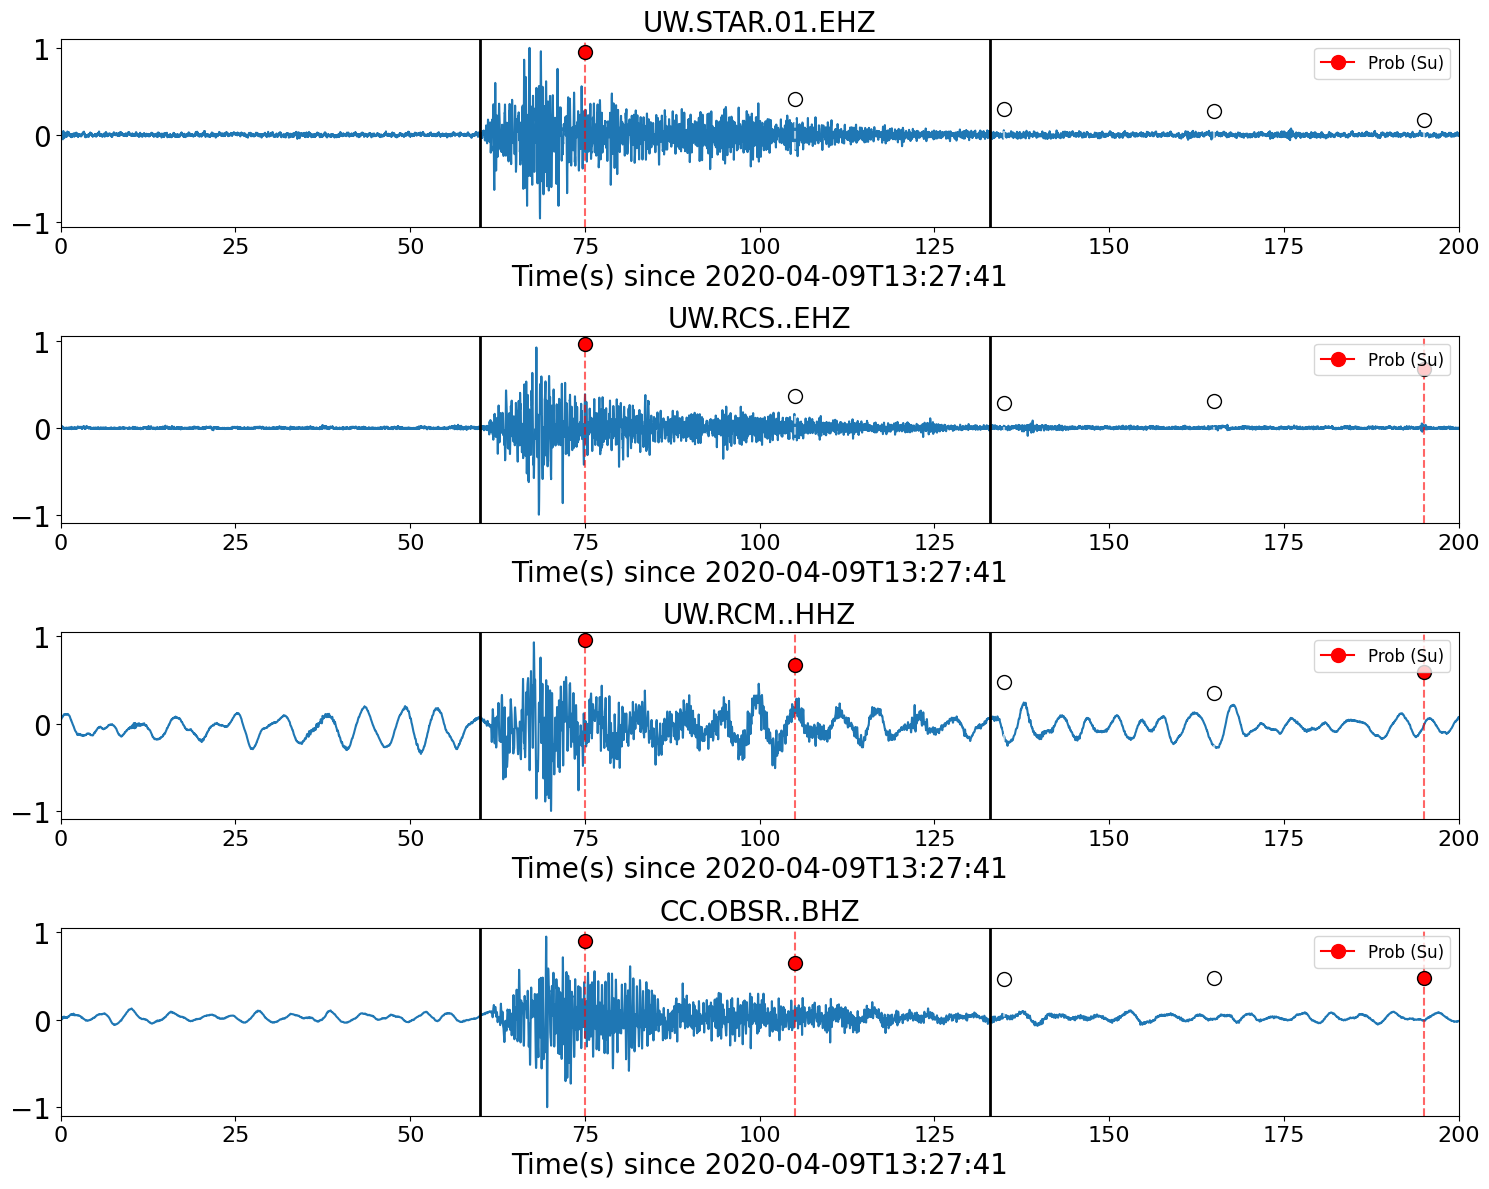

In [5]:
## Note the parameters ev_markers define the boundaries of actual event and are picked from ground truth data. 

plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns,
                       xlim = [0,200], 
                       ev_markers = [60, 133])

## Second We will try our surface event detector to detect a Icefall and Ice Avalanche that occurred on  Nisqually Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/14743775 and we can also see a video of the event here - https://www.youtube.com/watch?v=iDle-31t238


- Event type: Rockfall, Rock and Ice Avalanche
- Start Date: 	2011-06-25 23:04:05
- End Date: 2011-06-25 23:11:15
- Location: Nisqually Glacier


In [6]:
# startttime of trace
starttime = obspy.UTCDateTime(2011, 6, 25, 23, 4, 5) - 60

# duration
dur = 600

# stations ID
stations_id = [ 'UW.RCS', 'UW.RCM', 'CC.PARA', 'CC.COPP', 'CC.PANH', 'CC.OBSR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 21/21 [00:00<00:00, 331129.26it/s]

100%|██████████| 21/21 [00:00<00:00, 220752.84it/s]

100%|██████████| 21/21 [00:00<00:00, 185823.59it/s]

100%|██████████| 21/21 [00:00<00:00, 288788.14it/s]

100%|██████████| 6/6 [02:48<00:00, 28.16s/it]


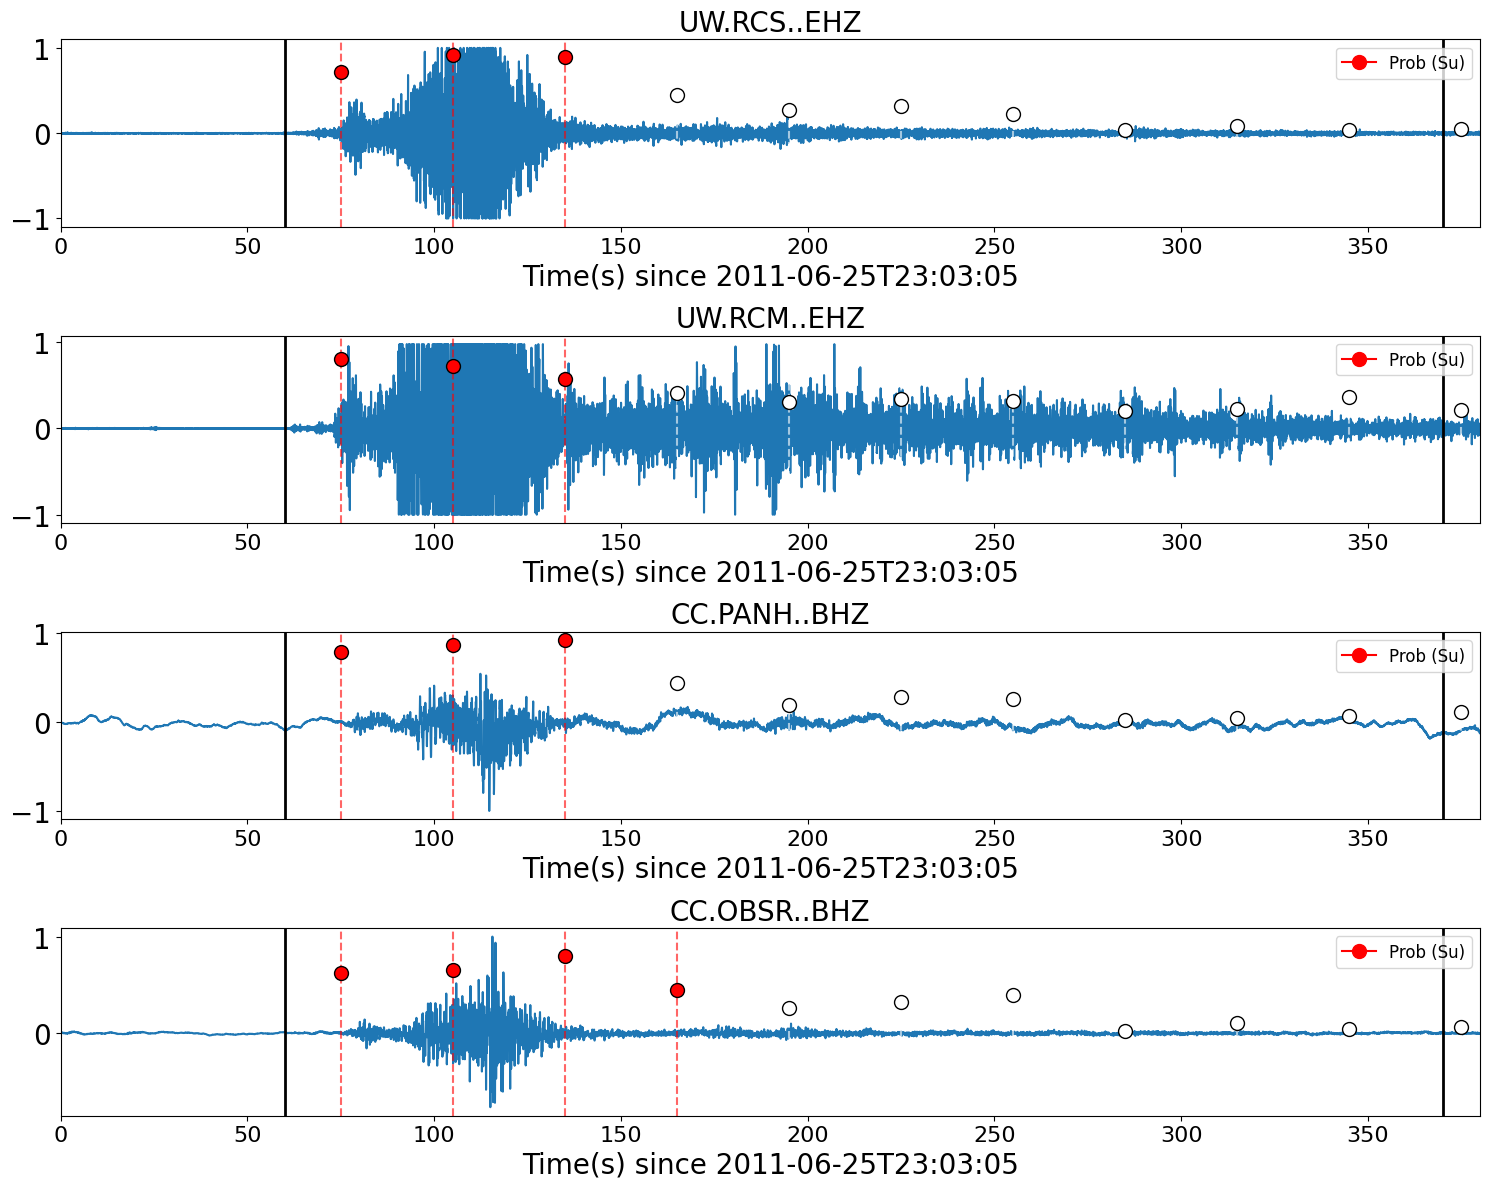

In [7]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,380], 
                       ev_markers = [60, 370])

## Third We will try our surface event detector to detect a Debris Flow that occurred on  Nisqually Glacier, Mount Rainier. 

This event is present in IRIS ESEC - https://ds.iris.edu/spud/esec/20008839 and we can also see more info of the event here - 


- Event type: Debris Flow
- Start Date: 	2019-09-27 00:43:20
- End Date: 	2019-09-27 01:29:22
- Location: Mount Rainier


In [8]:
# startttime of trace
starttime = obspy.UTCDateTime(2019, 9, 27, 0, 43, 20) - 60

# duration
dur = 60*60

# stations ID
stations_id = [ 'UW.LON', 'UW.RER','UW.LO2', 'UW.RCS', 'UW.RCM', 'UW.STAR', 'CC.PARA', 'CC.MIRR', 'CC.TABR']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 121/121 [00:00<00:00, 574757.40it/s]

100%|██████████| 120/120 [00:00<00:00, 271037.42it/s]

100%|██████████| 120/120 [00:00<00:00, 702955.98it/s]

100%|██████████| 120/120 [00:00<00:00, 461758.24it/s]

100%|██████████| 121/121 [00:00<00:00, 576716.80it/s]

100%|██████████| 240/240 [00:00<00:00, 668414.98it/s]

100%|██████████| 9/9 [13:18<00:00, 88.75s/it] 


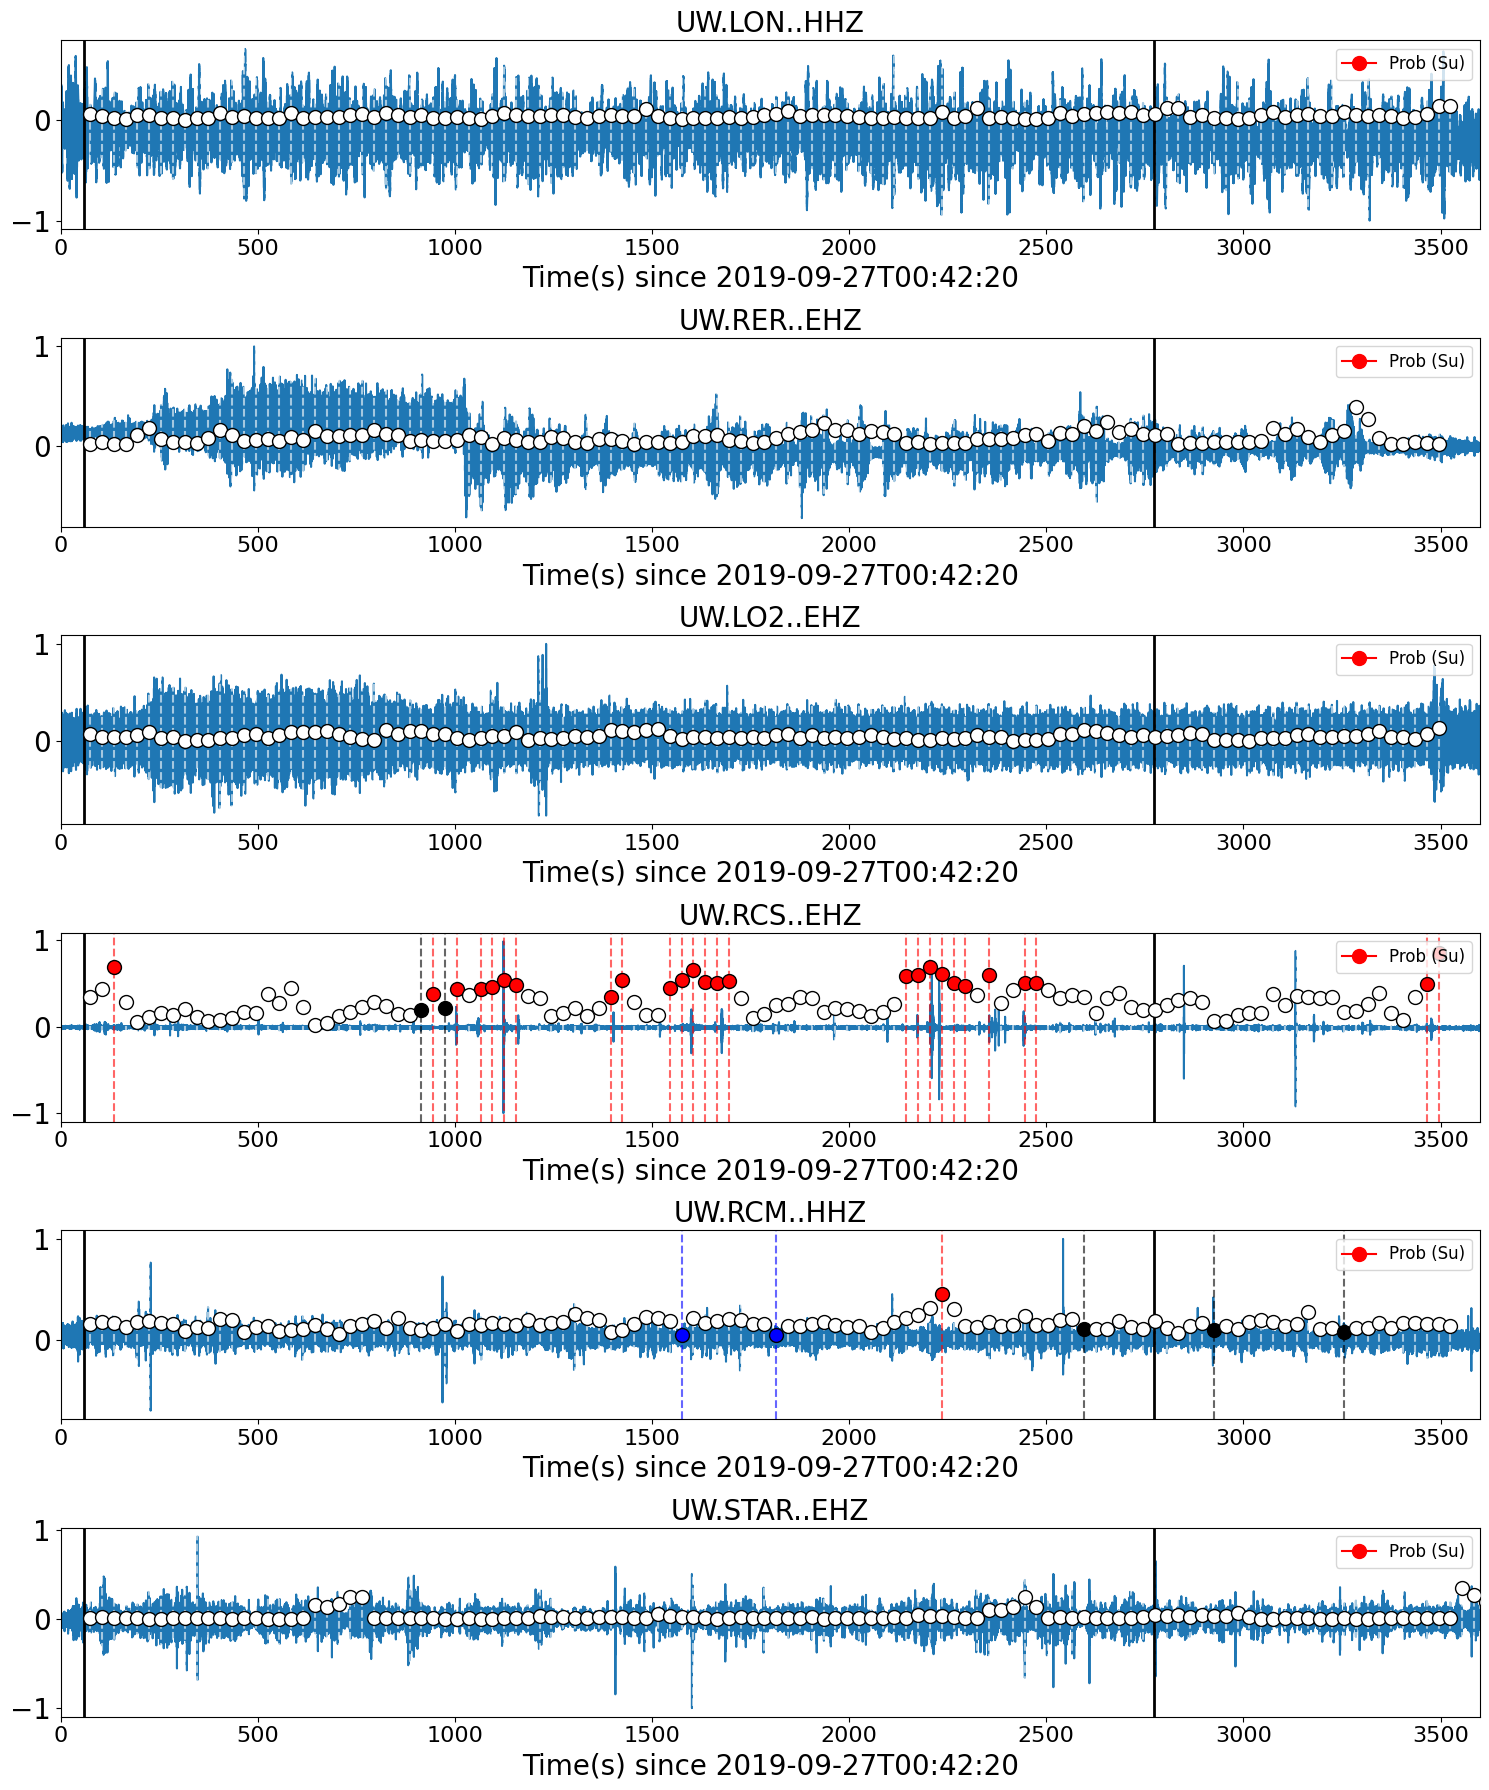

In [9]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,3600],ev_markers = [60, 2772])





## Another confirmed rockfall, this rockfall fooled the PNSN automated event detection and was labeled as Earthquake initially but further analysis revealed its actually a rockfall

More information about this event can be seen here - 
https://pnsn.org/blog/2015/08/21/summer-rockfall-time-yet-again

In [10]:
# startttime of trace
starttime = obspy.UTCDateTime(2015, 8, 19, 18, 49, 53) - 120

# duration
dur = 360

# stations ID
stations_id = [ 'UW.RER', 'UW.RCM', 'UW.STAR', 'UW.RCS', 'UW.FMW', 'UW.WPW', 'CC.PANH']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 12/12 [00:00<00:00, 215092.51it/s]

100%|██████████| 12/12 [00:00<00:00, 202950.19it/s]

100%|██████████| 12/12 [00:00<00:00, 170615.76it/s]

100%|██████████| 12/12 [00:00<00:00, 182361.04it/s]

100%|██████████| 12/12 [00:00<00:00, 234100.69it/s]

100%|██████████| 13/13 [00:00<00:00, 240202.43it/s]

100%|██████████| 7/7 [00:40<00:00,  5.77s/it]


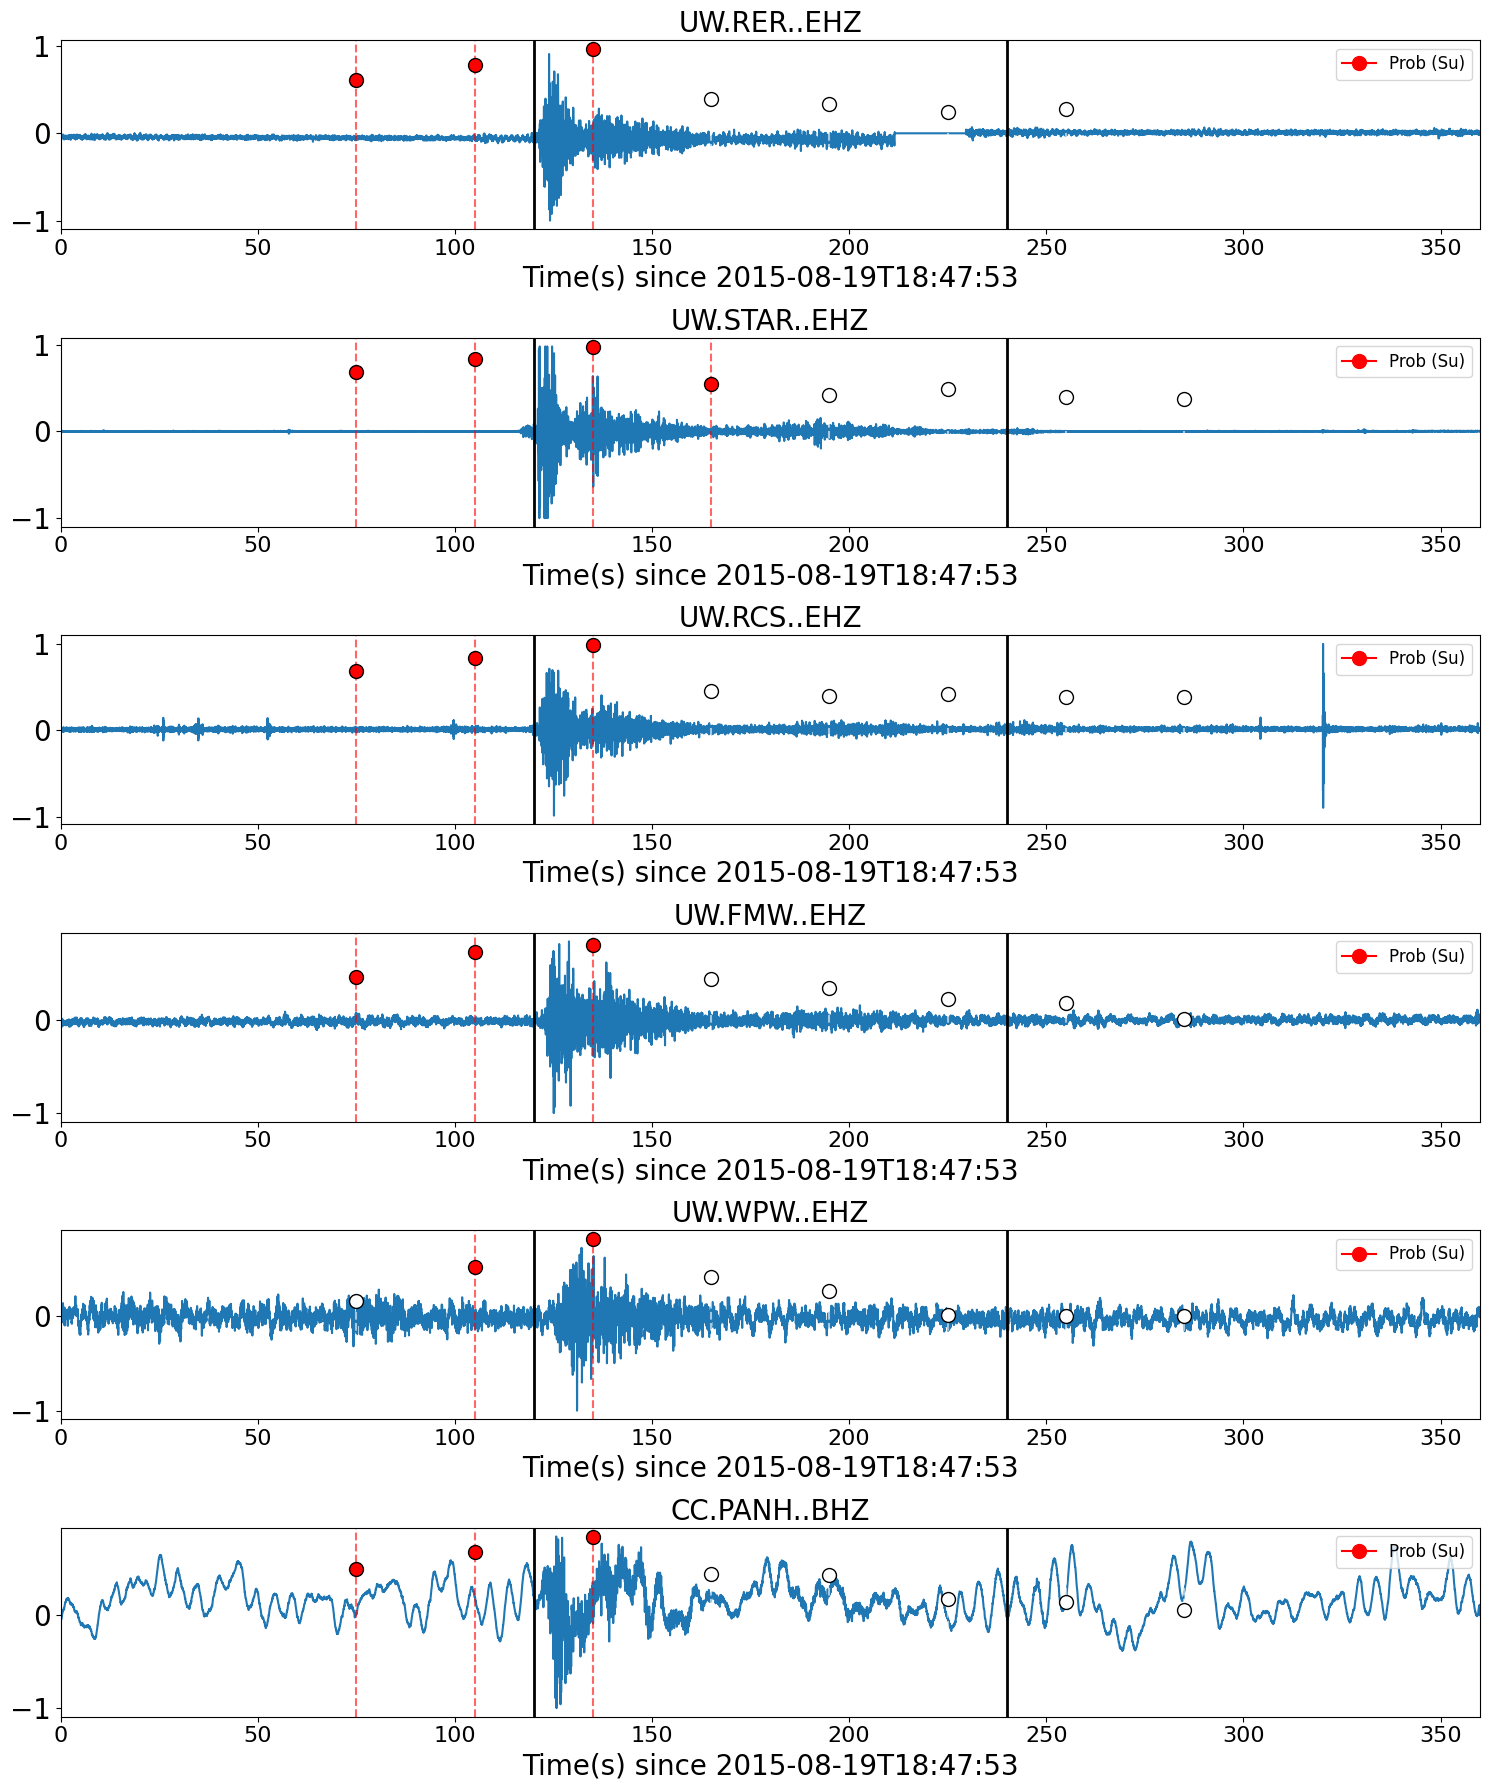

In [11]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,360],ev_markers = [120, 240])


## Testing the model on the events in different region than the model was trained on

- Here we are going to test our model on two large avalanches described very well in this paper - https://esurf.copernicus.org/articles/9/271/2021/ 

These avalanches occur on Iliamna volcano, one in 2016 and other one in 2019

In [12]:
# startttime of trace (UTCDateTime)
starttime = obspy.UTCDateTime(2016, 5, 22, 7, 56, 0) + 50

# duration
dur = 360

# stations ID
stations_id = [ 'AV.ILSW', 'TA.O20K', 'AV.OPT', 'AK.HOM']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 12/12 [00:00<00:00, 200524.49it/s]

100%|██████████| 12/12 [00:00<00:00, 155344.59it/s]

100%|██████████| 13/13 [00:00<00:00, 233016.89it/s]

100%|██████████| 12/12 [00:00<00:00, 224694.86it/s]

100%|██████████| 4/4 [00:24<00:00,  6.25s/it]


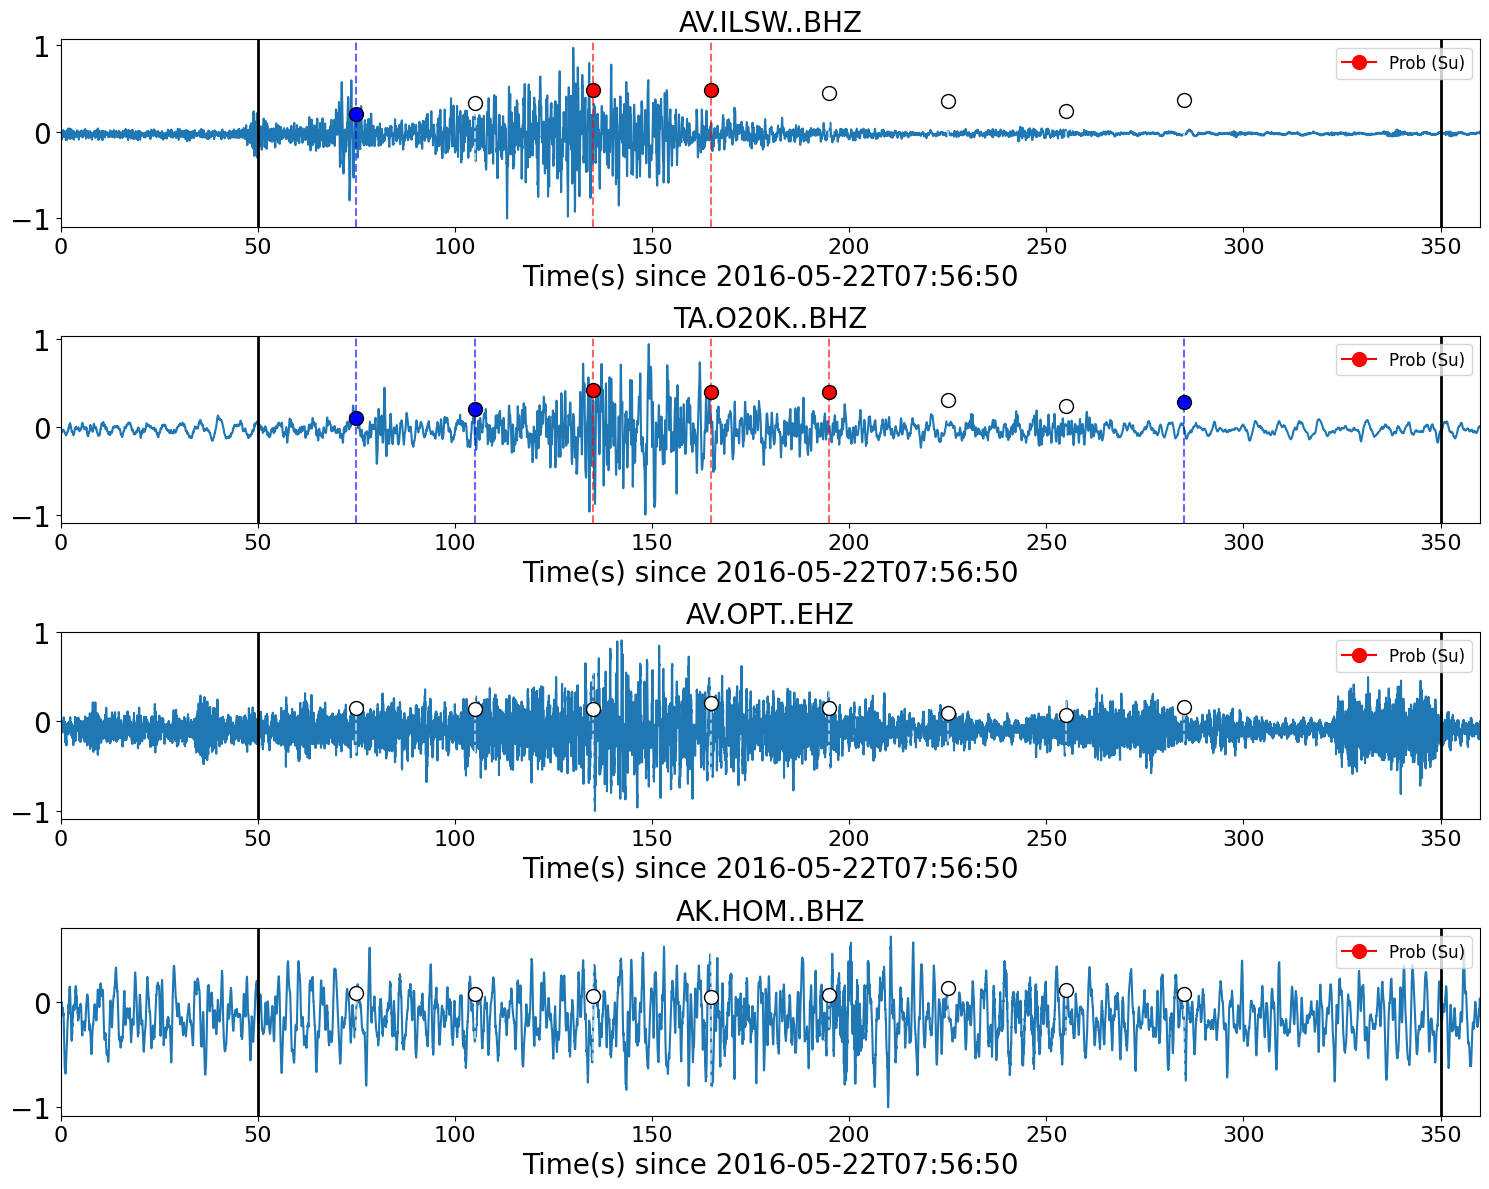

In [13]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,360],ev_markers = [50, 350])



## Testing the model on 2019 event

In [14]:
# startttime of trace (UTCDateTime)
starttime = obspy.UTCDateTime(2019, 6, 21, 0, 0, 1) - 0

# duration
dur = 480

# stations ID
stations_id = [ 'AV.ILSW', 'TA.O20K', 'AV.OPT', 'AK.HOM']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 16/16 [00:00<00:00, 238821.58it/s]

100%|██████████| 17/17 [00:00<00:00, 227805.65it/s]

100%|██████████| 17/17 [00:00<00:00, 275301.81it/s]

100%|██████████| 16/16 [00:00<00:00, 203360.19it/s]

100%|██████████| 4/4 [00:40<00:00, 10.16s/it]


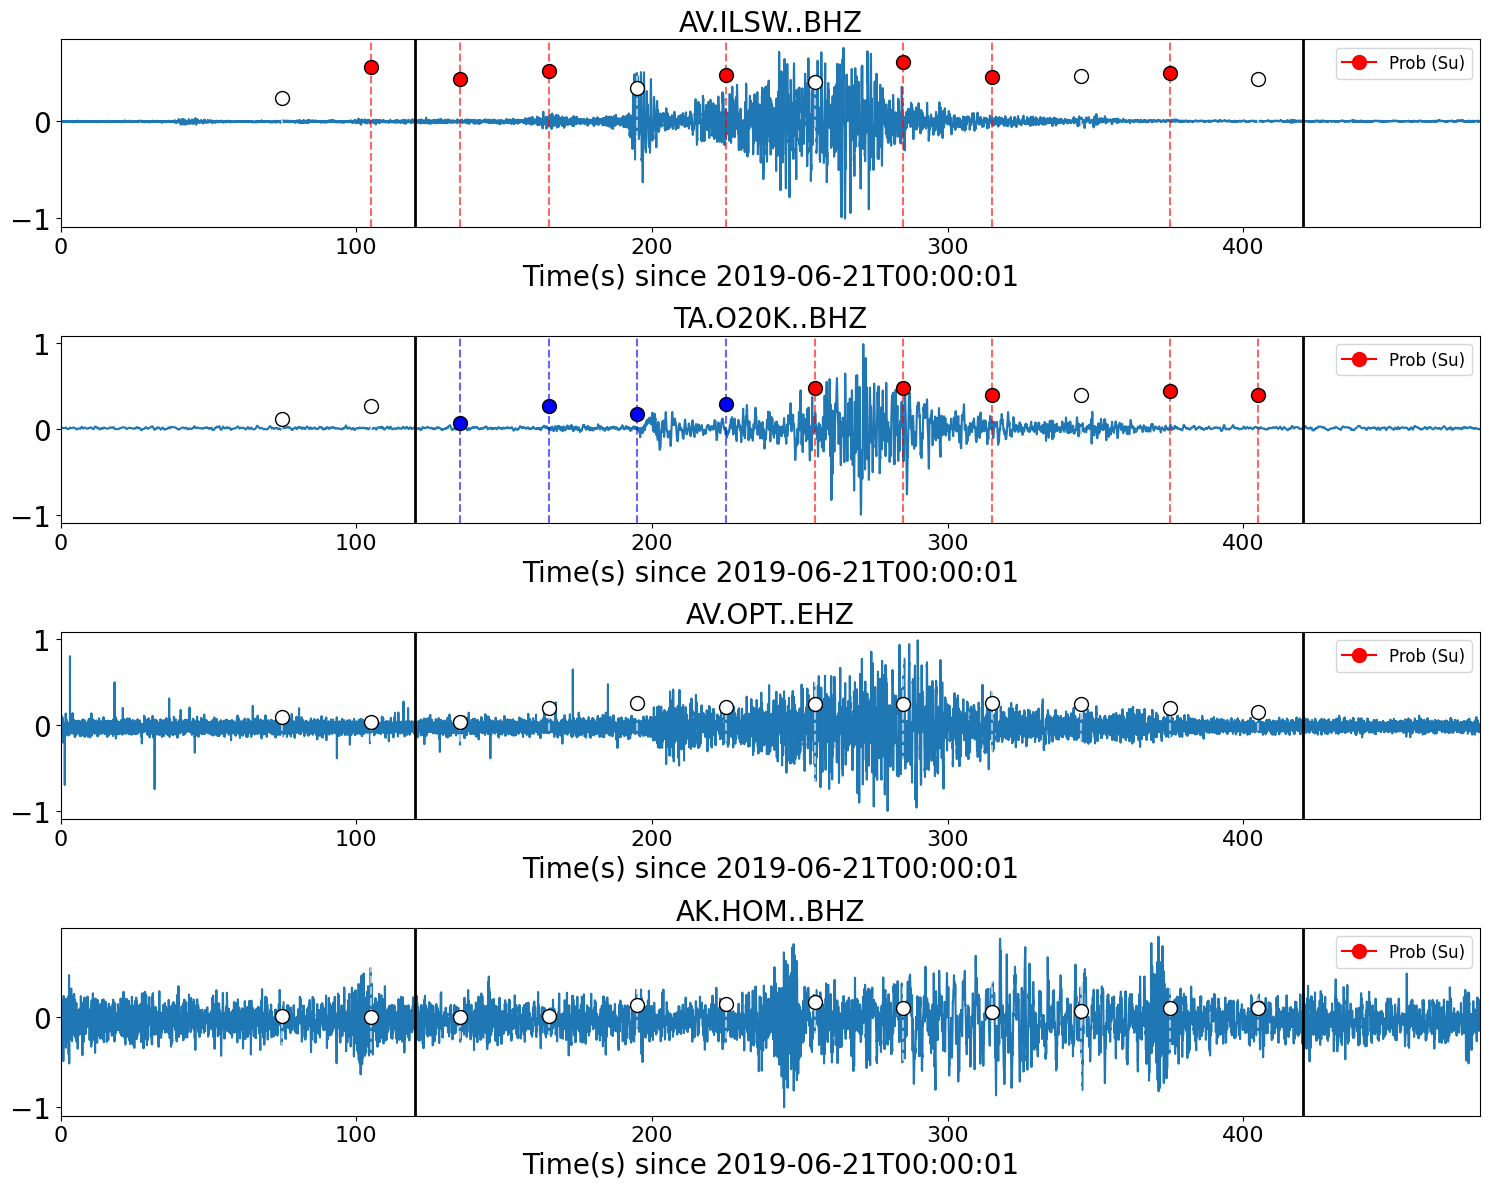

In [15]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,480],ev_markers = [120, 420])


## Now try running seismograms around surface events of your interest and see how it behaves!

In [16]:
# startttime of trace (UTCDateTime)
starttime = obspy.UTCDateTime(2021, 8, 9, 7, 45, 40) - 60

# duration
dur = 300

# stations ID
stations_id = [ 'AK.BAE', 'AK.BAT', 'AK.KNK', 'AK.PWL']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 10/10 [00:00<00:00, 176974.85it/s]

100%|██████████| 11/11 [00:00<00:00, 160757.30it/s]

100%|██████████| 10/10 [00:00<00:00, 144631.17it/s]

100%|██████████| 10/10 [00:00<00:00, 192399.27it/s]

100%|██████████| 4/4 [00:19<00:00,  4.85s/it]


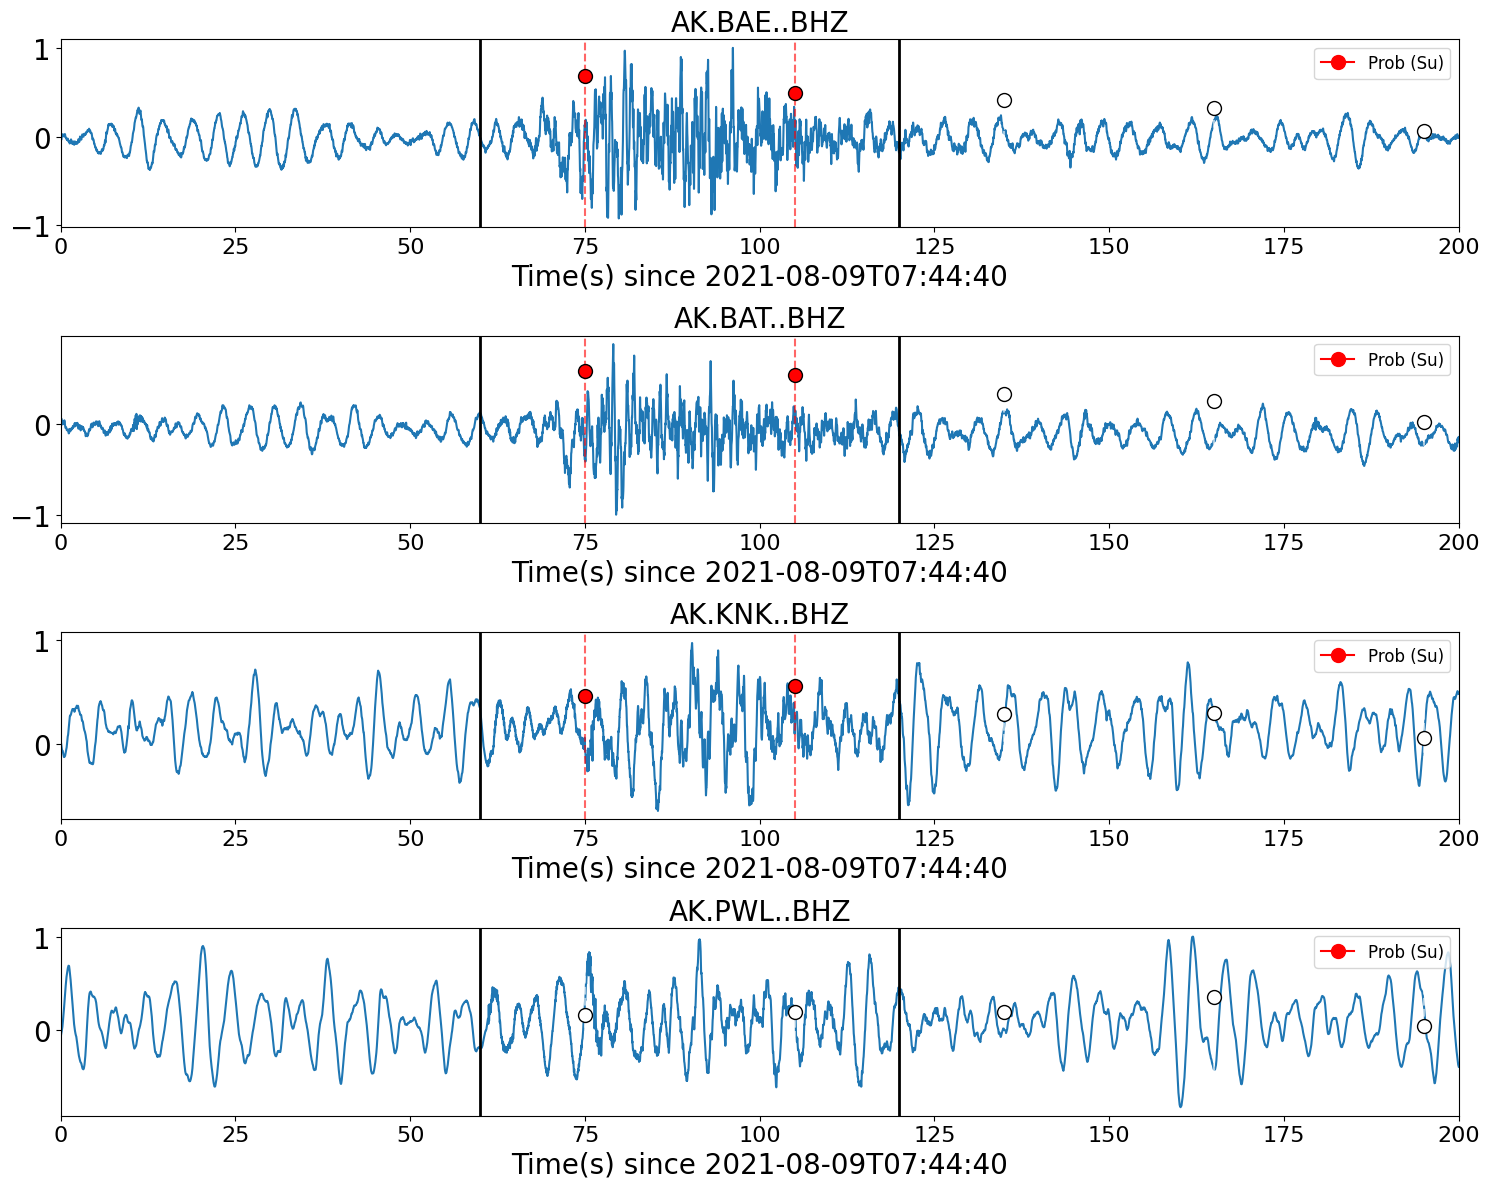

In [17]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,200],ev_markers = [60, 120])


In [18]:
index_stns

[[0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5]]

In [19]:
# startttime of trace
starttime = obspy.UTCDateTime(2024, 5, 9, 3, 33, 34) - 90

# duration
dur = 600

# stations ID
stations_id = ['CC.SEP', 'CC.REM', 'UW.HSR', 'CC.VALT']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 21/21 [00:00<00:00, 316835.91it/s]

100%|██████████| 21/21 [00:00<00:00, 278735.39it/s]

100%|██████████| 21/21 [00:00<00:00, 258300.25it/s]

100%|██████████| 21/21 [00:00<00:00, 327436.37it/s]

100%|██████████| 4/4 [00:56<00:00, 14.18s/it]


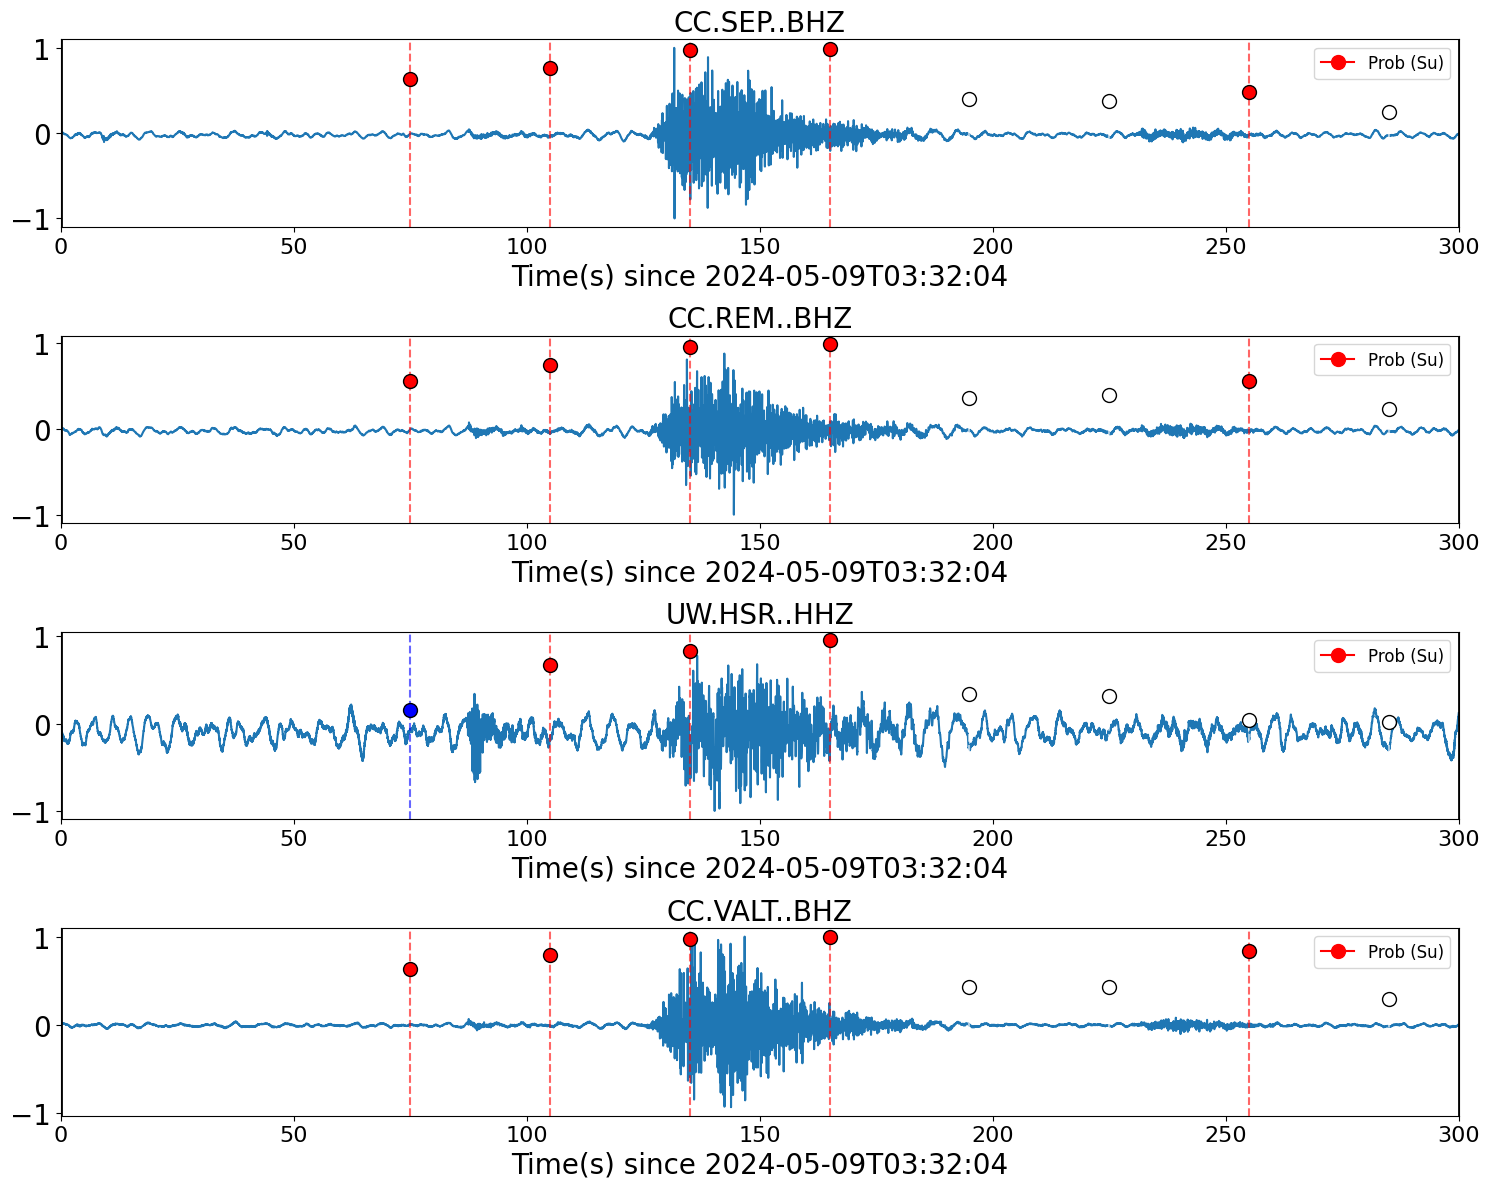

In [20]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,300],ev_markers = [0, 300])


In [45]:
# startttime of trace
starttime = obspy.UTCDateTime(2024,6,16,7,3,3) - 200

# duration
dur = 600

# stations ID
stations_id = ['UW.MARY',  'UW.MS99', 'UW.COWS', 'UW.SP2', 'UW.BHW']
result_stns, index_stns, prob_stns, st_overall, st_overall_data, st_overall_times = surface_event_detection(starttime = starttime, stations_id = stations_id, dur = dur)

100%|██████████| 21/21 [00:00<00:00, 321461.26it/s]

100%|██████████| 21/21 [00:00<00:00, 292625.86it/s]

100%|██████████| 21/21 [00:00<00:00, 312341.79it/s]

100%|██████████| 5/5 [01:24<00:00, 16.95s/it]


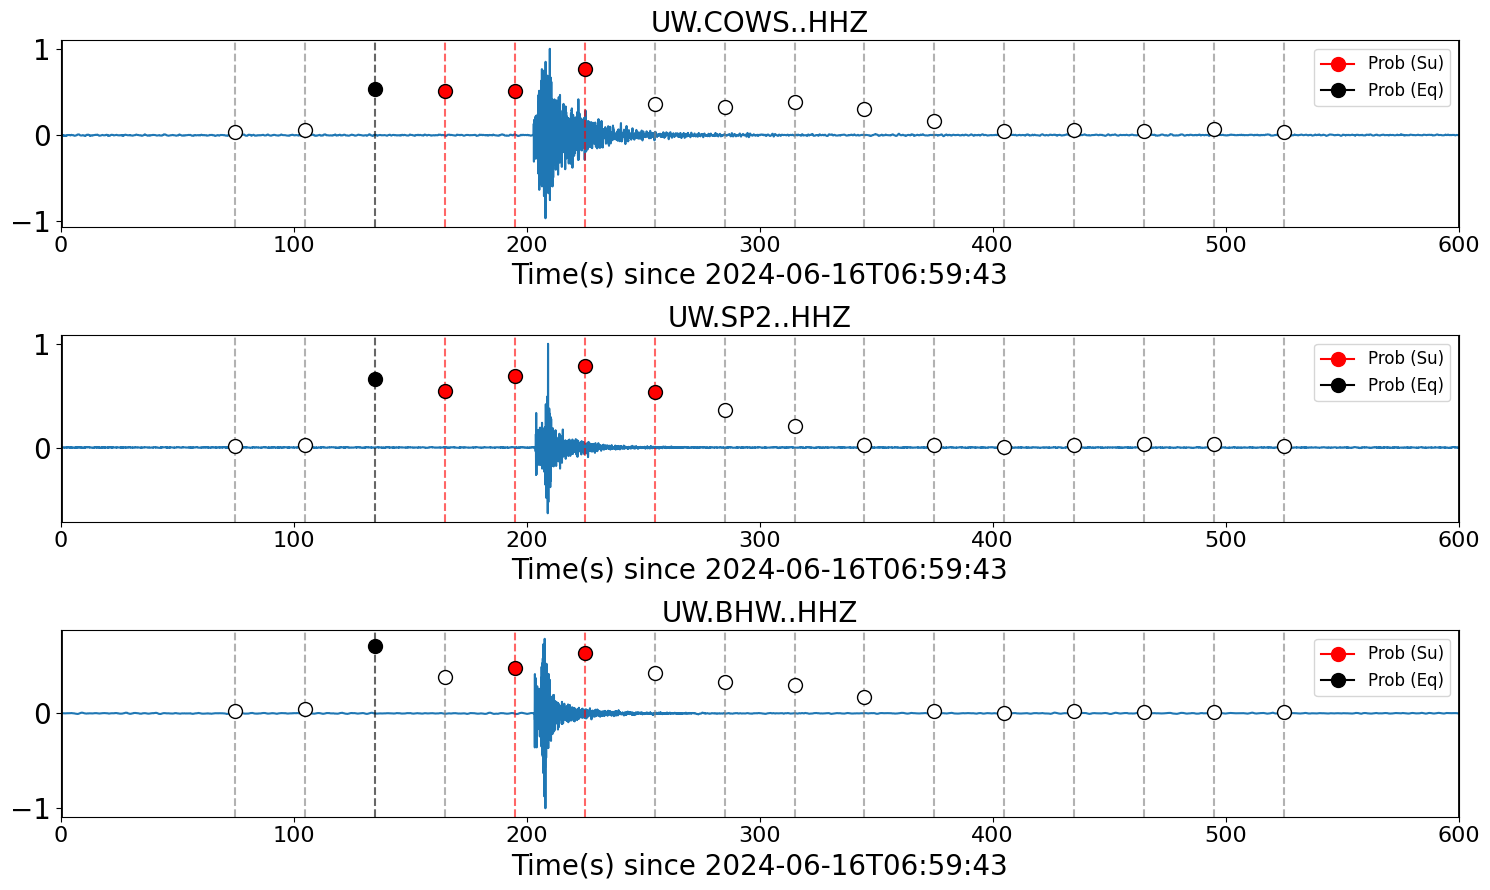

In [46]:
plot_detection_results(st_overall_data = st_overall_data, 
                       st_overall_times = st_overall_times, 
                       st_overall = st_overall, 
                       result_stns = result_stns, 
                       index_stns = index_stns, 
                       prob_stns = prob_stns, 
                       xlim = [0,dur],ev_markers = [0, dur])


In [48]:


print('')
print(starttime)
print(stations_id)
print(result_stns)
print(' This code is printing the maximum probability of a given class in the given duration')
print('')
print('   NET.STA  EQ    EX    NOISE  Surface')

for i in range(len(st_overall)):
        eqprob = np.max(np.array(prob_stns)[i, :,0,0])
        exprob = np.max(np.array(prob_stns)[i, :,0,1])
        noprob = np.max(np.array(prob_stns)[i, :,0,2])
        suprob = np.max(np.array(prob_stns)[i, :,0,3])

        print(i, st_overall[i][0].id, eqprob, exprob, noprob, suprob)
    
    


2024-06-16T06:59:43.000000Z
['UW.MARY', 'UW.MS99', 'UW.COWS', 'UW.SP2', 'UW.BHW']
[[array([2]), array([2]), array([0]), array([3]), array([3]), array([3]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2])], [array([2]), array([2]), array([0]), array([3]), array([3]), array([3]), array([3]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2])], [array([2]), array([2]), array([0]), array([2]), array([3]), array([3]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2]), array([2])]]
 This code is printing the maximum probability of a given class in the given duration

   NET.STA  EQ    EX    NOISE  Surface
0 UW.COWS..HHZ 0.538 0.234 0.91 0.77
1 UW.SP2..HHZ 0.66 0.146 0.988 0.788
2 UW.BHW..HHZ 0.714 0.156 0.992 0.634
